<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-December/blob/main/22-02-23-Agglomerative/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Contest](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [3]:
! unzip ./archive.zip

Archive:  ./archive.zip
  inflating: Mall_Customers.csv      


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
df = pd.read_csv('/content/Mall_Customers.csv')
df = df.drop('CustomerID', axis = 1)
df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
137,Male,32,73,73
102,Male,67,62,59
57,Male,69,44,46
35,Female,21,33,81
13,Female,24,20,77


In [10]:
df.rename(
      columns = {
          'Annual Income (k$)': 'AnnualIncome', 
          'Spending Score (1-100)': 'SpendingScore'
       }, inplace = True
    )
df.sample(3)

,Gender,Age,AnnualIncome,SpendingScore
159,Female,30,78,73
118,Female,51,67,43
147,Female,32,77,74


In [13]:
df['Gender'] = df['Gender'].replace({
    'Male': 1,
    'Female': 0
})
df.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


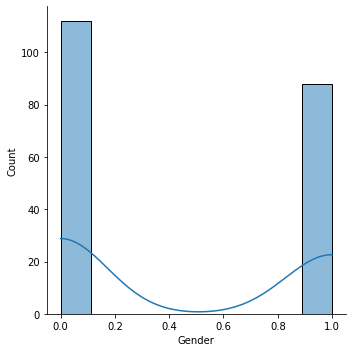

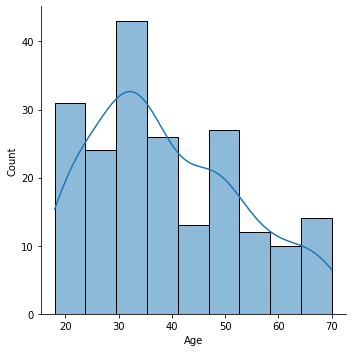

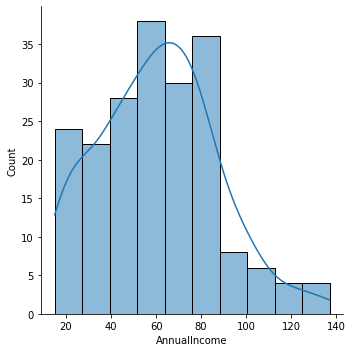

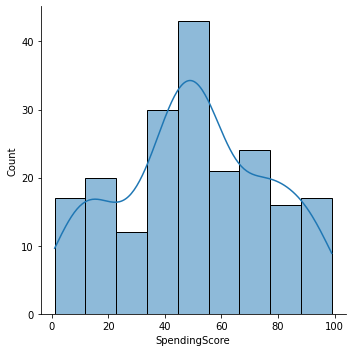

In [15]:
for col in df.columns:
    sns.displot(df[col], kde = True)

In [57]:
from scipy.cluster.hierarchy import linkage

merg = linkage(df, method='ward', metric='euclidean')

In [58]:
merg.shape

(199, 4)

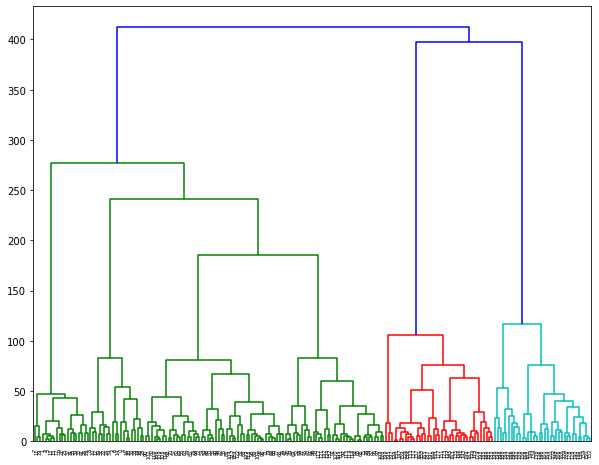

In [59]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))

dendrogram(merg)
plt.show()

In [46]:
from scipy.cluster.hierarchy import cut_tree

y_pred = cut_tree(merg, n_clusters=5)
y_pred = y_pred.reshape(-1)
y_pred.shape

(200,)

In [47]:
df['cluster'] = y_pred

In [48]:
import plotly.express as px
# Gender	Age	AnnualIncome	SpendingScore

px.scatter_3d(df, x = 'AnnualIncome',	y='SpendingScore', z = 'Age', color = 'cluster')

In [49]:
import plotly.express as px
# Gender	Age	AnnualIncome	SpendingScore

px.scatter_3d(df, x = 'AnnualIncome',	y='SpendingScore', z = 'Gender', color = 'cluster')

Text(0, 0.5, 'SpendingScore')

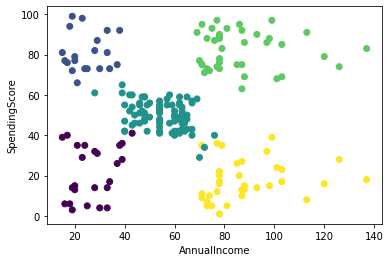

In [60]:
import plotly.express as px
# Gender	Age	AnnualIncome	SpendingScore

plt.scatter(df['AnnualIncome'],	df['SpendingScore'], c = df['cluster'])
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')